# Pair Programming Estandarización

Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None # recordamos que este comando nos pe

Dado que en el ejercicio anterior consideramos que el proceso que más nos acercaba a la normalidad era el método de raíces cuadradas incorporamos esos datos, por lo que en esta ocasión vamos a seguir trabajando a partir de ese archivo:

In [2]:
df = pd.read_csv("datos/wellness_5.csv", index_col = 0)

In [3]:
df1 = df.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15286 entries, 0 to 15971
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FRUITS_VEGGIES                15286 non-null  int64  
 1   DAILY_STRESS                  15286 non-null  object 
 2   CORE_CIRCLE                   15286 non-null  int64  
 3   SOCIAL_NETWORK                15286 non-null  int64  
 4   BMI_RANGE                     15286 non-null  int64  
 5   DAILY_STEPS                   15286 non-null  int64  
 6   SLEEP_HOURS                   15286 non-null  int64  
 7   SUFFICIENT_INCOME             15286 non-null  int64  
 8   TIME_FOR_PASSION              15286 non-null  int64  
 9   WEEKLY_MEDITATION             15286 non-null  int64  
 10  AGE                           15286 non-null  object 
 11  GENDER                        15286 non-null  object 
 12  WORK_LIFE_BALANCE_SCORE       15286 non-null  float64
 13  W

In [5]:
df1.columns

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'CORE_CIRCLE', 'SOCIAL_NETWORK',
       'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER',
       'WORK_LIFE_BALANCE_SCORE', 'WORK_LIFE_BALANCE_SCORE_RAIZ'],
      dtype='object')

In [6]:
# cambiamos el tipo de datos a 3 columnas: 
for col in['DAILY_STRESS', 'BMI_RANGE', 'SUFFICIENT_INCOME']: df[col] = df[col].astype('category') 

In [7]:
# Cómo las estrategias siguientes sólo las utilizaremos en variables predictoras, extraemos la variable respuesta:
numericas = df1.select_dtypes(include = np.number).drop(['WORK_LIFE_BALANCE_SCORE', 'WORK_LIFE_BALANCE_SCORE_RAIZ'],axis=1)
numericas.head()

,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION
0,3,5,5,1,5,7,1,0,5
1,2,3,10,2,5,8,2,2,6
2,2,4,10,2,4,8,2,8,3
3,3,3,7,2,5,5,1,2,0
4,5,3,4,2,5,7,2,1,5


* Estandarización manual

In [8]:
numericas.columns

Index(['FRUITS_VEGGIES', 'CORE_CIRCLE', 'SOCIAL_NETWORK', 'BMI_RANGE',
       'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION'],
      dtype='object')

In [9]:
numericas.describe().T # Para saber cuáles son sus valores máximos, mínimos, media,etc.

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15286.0,2.923983,1.442694,0.0,2.0,3.0,4.0,5.0
CORE_CIRCLE,15286.0,5.517074,2.837400,0.0,3.0,5.0,8.0,10.0
SOCIAL_NETWORK,15286.0,6.491365,3.084020,0.0,4.0,6.0,10.0,10.0
BMI_RANGE,15286.0,1.409852,0.491822,1.0,1.0,1.0,2.0,2.0
DAILY_STEPS,15286.0,5.717912,2.886237,1.0,3.0,6.0,8.0,10.0
SLEEP_HOURS,15286.0,7.038401,1.200056,1.0,6.0,7.0,8.0,10.0
SUFFICIENT_INCOME,15286.0,1.730211,0.443865,1.0,1.0,2.0,2.0,2.0
TIME_FOR_PASSION,15286.0,3.327882,2.731594,0.0,1.0,3.0,5.0,10.0
WEEKLY_MEDITATION,15286.0,6.217912,3.014143,0.0,4.0,6.0,10.0,10.0


La estandarización se hará sobre las columnas predictoras:

#### Estandarización manual:

In [10]:
# Creamos distintas variables con los estadísticos media y desviación estándar, que son los que necesitamos.

media = numericas['TIME_FOR_PASSION'].mean()
desviacion = numericas['TIME_FOR_PASSION'].std()

In [11]:
numericas['TIME_FOR_PASSION_ESTA'] = (numericas['TIME_FOR_PASSION'] - media) / desviacion

In [12]:
numericas.head(2)

,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,TIME_FOR_PASSION_ESTA
0,3,5,5,1,5,7,1,0,5,-1.218293
1,2,3,10,2,5,8,2,2,6,-0.486120


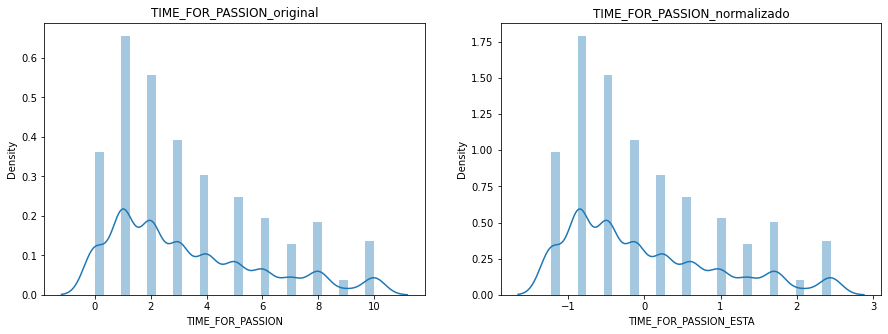

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('TIME_FOR_PASSION_original')
axes[1].set_title('TIME_FOR_PASSION_normalizado')

sns.distplot(numericas['TIME_FOR_PASSION'] ,ax = axes[0])
sns.distplot(numericas['TIME_FOR_PASSION_ESTA'], ax = axes[1]);

Dado que cuando estandarizamos lo que hacemos es que la media = 0, y la desviación = 1, lo chequeamos:

In [14]:
print(f'La media de la columna TIME_FOR_PASSION es:  {np.round(numericas["TIME_FOR_PASSION"].mean(),1)}')
print(f'La desviación estándar de la columna TIME_FOR_PASSION es: {np.round(numericas["TIME_FOR_PASSION_ESTA"].std(),1)}')

La media de la columna TIME_FOR_PASSION es:  3.3
La desviación estándar de la columna TIME_FOR_PASSION es: 1.0


In [78]:
media = numericas['TIME_FOR_PASSION'].mean()
desviacion = numericas['TIME_FOR_PASSION'].std()

In [79]:
numericas['TIME_FOR_PASSION_ESTA'] = (numericas['TIME_FOR_PASSION'] - media) / desviacion

In [35]:
numericas.head(2)

,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,TIME_FOR_PASSION_ESTA
0,3,5,5,1,5,7,1,0,5,-1.218293
1,2,3,10,2,5,8,2,2,6,-0.486120


#### Estandarización con el método Sklearn StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# iniciamos el método para escalar

scaler = StandardScaler()

In [17]:
numericas.columns

Index(['FRUITS_VEGGIES', 'CORE_CIRCLE', 'SOCIAL_NETWORK', 'BMI_RANGE',
       'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'TIME_FOR_PASSION_ESTA'],
      dtype='object')

In [18]:
# La estandarización solo se hace para las variables predictoras:
numericas.drop(['TIME_FOR_PASSION_ESTA'], axis = 1, inplace = True)

numericas.head(2)


,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION
0,3,5,5,1,5,7,1,0,5
1,2,3,10,2,5,8,2,2,6


In [19]:
# Ajustamos los datos:

scaler.fit(numericas)

StandardScaler()

In [20]:
# Los transformamos:
escaladas = scaler.transform(numericas)

In [21]:
# Como nos devuelve un array lo convertimos en un dataframe.
numericas_escaladas = pd.DataFrame(escaladas, columns = numericas.columns)
numericas_escaladas.head(2)

,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION
0,0.052693,-0.182241,-0.483594,-0.833361,-0.248744,-0.032001,-1.645173,-1.218333,-0.404079
1,-0.640478,-0.887135,1.137720,1.199960,-0.248744,0.801321,0.607839,-0.486136,-0.072299


In [22]:
# Llegados a este punto ya están todas las columnas numéricas estandarizadas.
# Comprobamos cuales son sus valores de media y desviación estándar: 

for columna in numericas_escaladas.columns:
    print(f'La media de la columna {columna} es:  {numericas_escaladas[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_escaladas[columna].std()}')
    print("-------------------------------------------------------------")


La media de la columna FRUITS_VEGGIES es:  5.267857907631991e-16
La desviación estándar de la columna FRUITS_VEGGIES es: 1.0000327112739147
-------------------------------------------------------------
La media de la columna CORE_CIRCLE es:  -1.0915280484025663e-15
La desviación estándar de la columna CORE_CIRCLE es: 1.000032711273899
-------------------------------------------------------------
La media de la columna SOCIAL_NETWORK es:  1.7140402519916161e-15
La desviación estándar de la columna SOCIAL_NETWORK es: 1.0000327112740235
-------------------------------------------------------------
La media de la columna BMI_RANGE es:  -9.375261844424591e-15
La desviación estándar de la columna BMI_RANGE es: 1.0000327112739968
-------------------------------------------------------------
La media de la columna DAILY_STEPS es:  8.35419947563025e-16
La desviación estándar de la columna DAILY_STEPS es: 1.0000327112739855
-------------------------------------------------------------
La media d

Ahora las columnas ya se encuentran en unidades comparables, lo vamos a ver visualmente.

In [23]:
numericas_escaladas.head(2)

,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION
0,0.052693,-0.182241,-0.483594,-0.833361,-0.248744,-0.032001,-1.645173,-1.218333,-0.404079
1,-0.640478,-0.887135,1.137720,1.199960,-0.248744,0.801321,0.607839,-0.486136,-0.072299


In [24]:
numericas_escaladas.describe().T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15286.0,5.267858e-16,1.000033,-2.026818,-0.640478,0.052693,0.745863,1.439034
CORE_CIRCLE,15286.0,-1.091528e-15,1.000033,-1.944476,-0.887135,-0.182241,0.875099,1.579993
SOCIAL_NETWORK,15286.0,1.714040e-15,1.000033,-2.104908,-0.807857,-0.159331,1.137720,1.137720
BMI_RANGE,15286.0,-9.375262e-15,1.000033,-0.833361,-0.833361,-0.833361,1.199960,1.199960
DAILY_STEPS,15286.0,8.354199e-16,1.000033,-1.634677,-0.941711,0.097739,0.790705,1.483672
SLEEP_HOURS,15286.0,1.064379e-15,1.000033,-5.031930,-0.865322,-0.032001,0.801321,2.467964
SUFFICIENT_INCOME,15286.0,1.575883e-15,1.000033,-1.645173,-1.645173,0.607839,0.607839,0.607839
TIME_FOR_PASSION,15286.0,-3.662400e-15,1.000033,-1.218333,-0.852234,-0.120037,0.612160,2.442653
WEEKLY_MEDITATION,15286.0,-6.028295e-19,1.000033,-2.062979,-0.735859,-0.072299,1.254822,1.254822


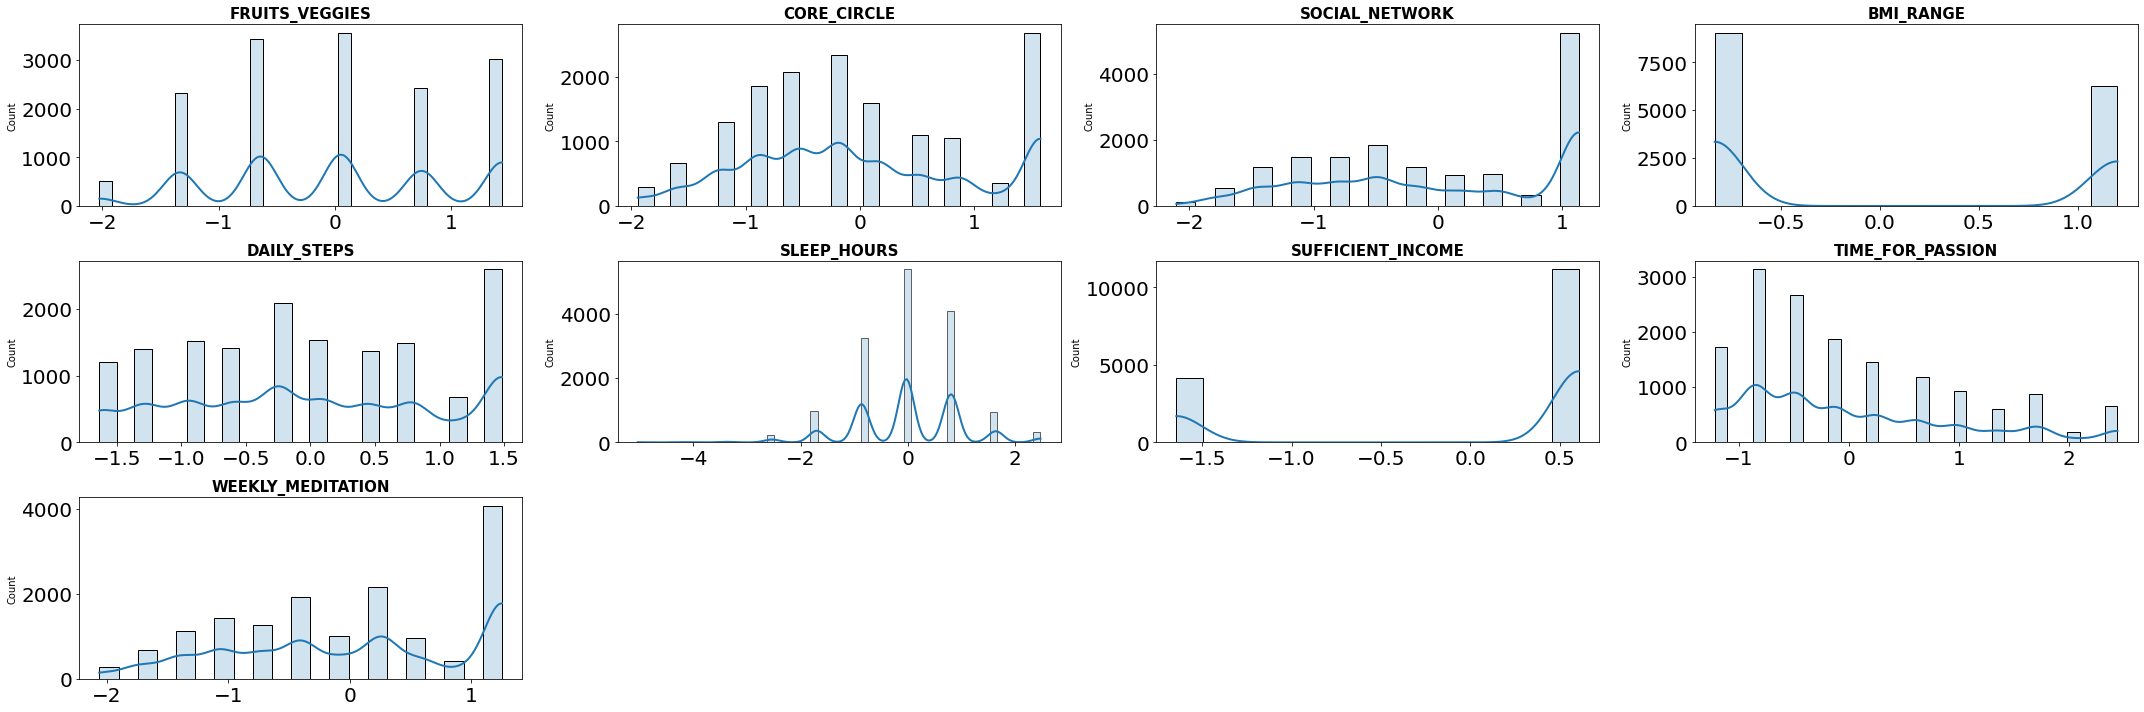

In [25]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 10))

columnas_escaladas = numericas_escaladas.columns
axes = axes.flat


for i, colum in enumerate(columnas_escaladas): 
    sns.histplot(
        data = numericas_escaladas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])

Al comprobarlo visualmente, podemos ver entre qué rangos se encuentran los valores de las columnas.

Cómo nosotras no tenemos outliers en nuestros datos vamos a guardar la estandarización realizada con Standard scaler, que suele ser el más utilizado.

#### Estandarización con el método Sklearn RobustScaler

Este método es el más apropiado cuando hay outliers entre los datos, ya que no utiliza la media y reducirá su efecto.

In [58]:
#from sklearn.preprocessing import RobustScaler

In [59]:
# Construir el modelo del escalador
#robust = RobustScaler()

In [60]:
# Ajustamos el modelo con el set de datos:
#robust.fit(numericas)

RobustScaler()

In [61]:
# Transformamos los datos:
#X_robust = robust.transform(numericas)

In [62]:
# Como nos da un array lo convertimos en un dataframe. 

#numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
#numericas_robust.head(2)

,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION
0,0.0,0.0,-0.166667,0.0,-0.2,0.0,-1.0,-0.75,-0.166667
1,-0.5,-0.4,0.666667,1.0,-0.2,0.5,0.0,-0.25,0.000000


In [63]:
#for columna in numericas_robust.columns:
   # print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    #print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    #print("-------------------------------------------------------------")

La media de la columna FRUITS_VEGGIES es:  -0.03800863535261023
La desviación estándar de la columna FRUITS_VEGGIES es: 0.7213468748759678
-------------------------------------------------------------
La media de la columna CORE_CIRCLE es:  0.10341488944131803
La desviación estándar de la columna CORE_CIRCLE es: 0.5674799380273438
-------------------------------------------------------------
La media de la columna SOCIAL_NETWORK es:  0.08189410789829725
La desviación estándar de la columna SOCIAL_NETWORK es: 0.5140033043584139
-------------------------------------------------------------
La media de la columna BMI_RANGE es:  0.40985215229621874
La desviación estándar de la columna BMI_RANGE es: 0.4918223152573105
-------------------------------------------------------------
La media de la columna DAILY_STEPS es:  -0.056417637053517725
La desviación estándar de la columna DAILY_STEPS es: 0.5772474491812192
-------------------------------------------------------------
La media de la colu

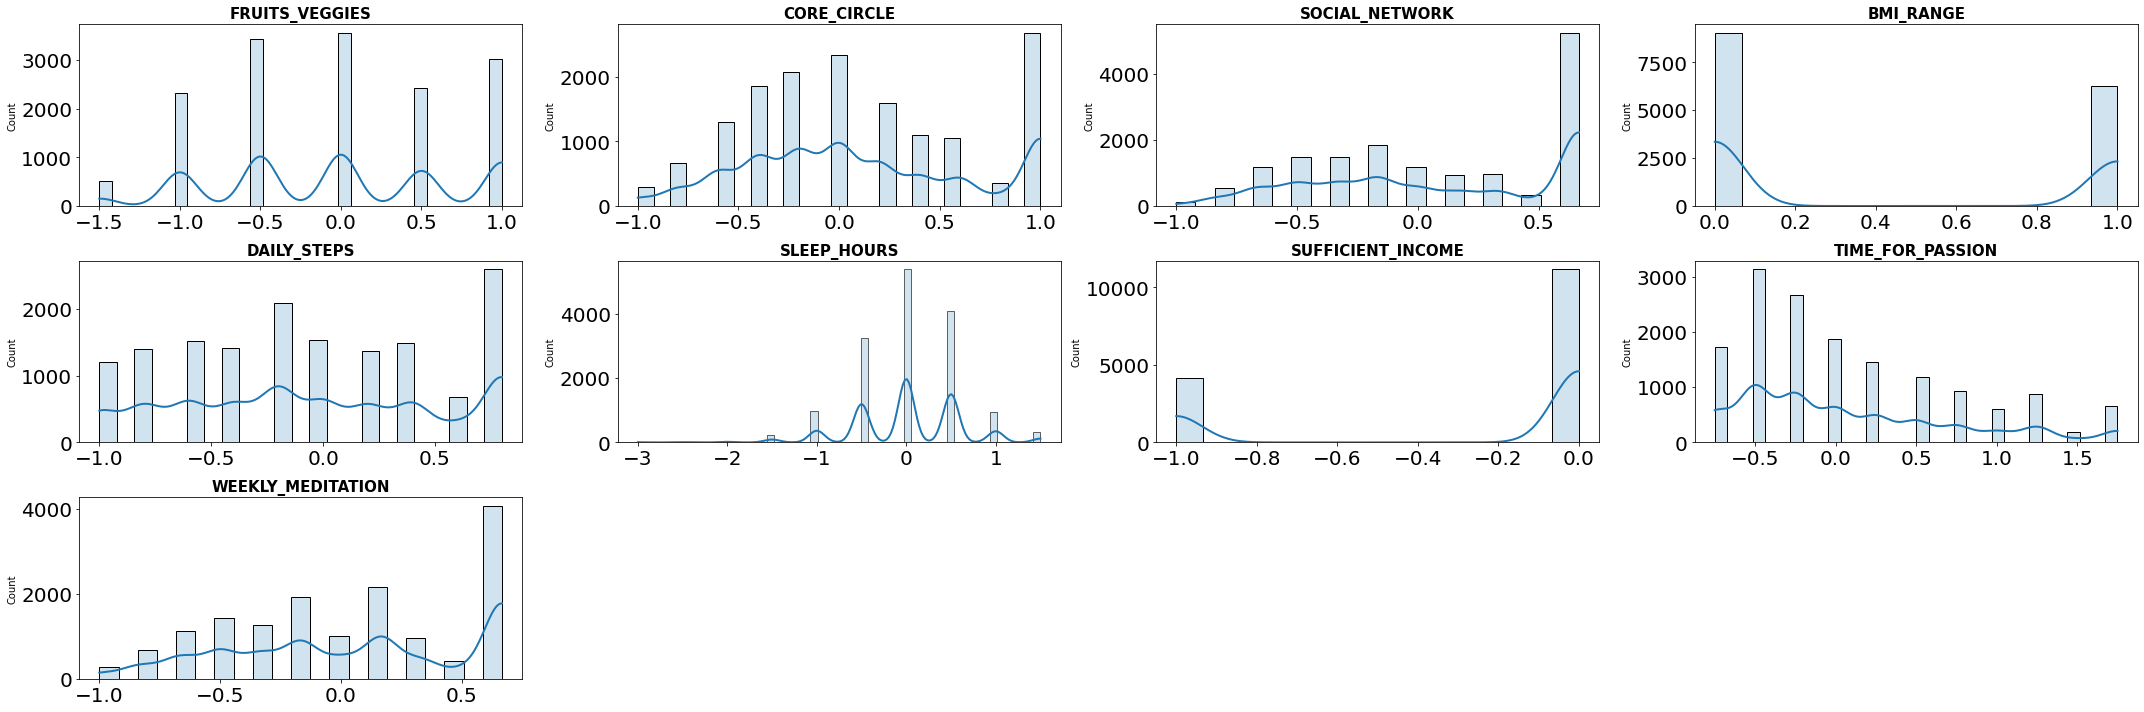

In [64]:
#fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30, 10))

#columnas_robust = numericas_robust.columns
#axes = axes.flat


#for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])

In [30]:
# vamos a guardar este dataframe para seguir trabajando en la siguiente lección de Encoding con el. 
# Pero antes de eso tenemos que juntar los resultados de la estandarización a nuestro dataframe original
df[numericas_escaladas.columns] = numericas_escaladas
df.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,WORK_LIFE_BALANCE_SCORE_RAIZ
0,0.052693,2,-0.182241,-0.483594,-0.833361,-0.248744,-0.032001,-1.645173,-1.218333,-0.404079,36 to 50,Female,609.5,24.688054
1,-0.640478,3,-0.887135,1.137720,1.199960,-0.248744,0.801321,0.607839,-0.486136,-0.072299,36 to 50,Female,655.6,25.604687


In [28]:
numericas_escaladas.columns

Index(['FRUITS_VEGGIES', 'CORE_CIRCLE', 'SOCIAL_NETWORK', 'BMI_RANGE',
       'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION'],
      dtype='object')

In [32]:
# guardamos los datos
df.to_csv("datos/wellness_6_norm_est.csv")